In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [10]:
geyser = sns.load_dataset('geyser')
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [12]:
# Convert kind column to binary
geyser = pd.get_dummies(geyser, columns=['kind'], drop_first=True)

In [13]:
geyser.head()

,duration,waiting,kind_short
0,3.600,79,0
1,1.800,54,1
2,3.333,74,0
3,2.283,62,1
4,4.533,85,0


In [23]:
geyser.describe()

,duration,waiting,kind_short
count,272.000000,272.000000,272.000000
mean,3.487783,70.897059,0.367647
std,1.141371,13.594974,0.483053
min,1.600000,43.000000,0.000000
25%,2.162750,58.000000,0.000000
50%,4.000000,76.000000,0.000000
75%,4.454250,82.000000,1.000000
max,5.100000,96.000000,1.000000


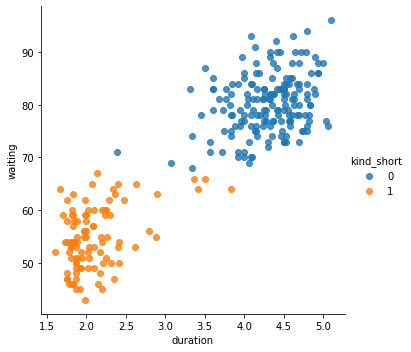

In [17]:
sns.lmplot(x='duration', y='waiting', data=geyser, hue='kind_short', fit_reg=False)

In [22]:
X = geyser.drop('kind_short', axis=1)
y = geyser['kind_short']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(244, 2) (28, 2) (244,) (28,)


In [59]:
log_reg_pipe = make_pipeline(StandardScaler(),
                             LogisticRegression(penalty='l2', random_state=42))

log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [34]:
log_reg_pipe.score(X_train, y_train)

0.9836065573770492

In [38]:
pred = log_reg_pipe.predict(X_test)
pred_proba = log_reg_pipe.predict_proba(X_test)

test_acc = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 1.0000
Test F1 Score: 1.0000


In [62]:
# Get parameters for model to graph decision boundary
coefs = log_reg_pipe.named_steps['logisticregression'].coef_
dur, wait = coefs[0][0], coefs[0][1]
intercept = log_reg_pipe.named_steps['logisticregression'].intercept_[0]

print(f'Duration coefficient: {dur:.2f}')
print(f'Waiting coefficient: {wait:.2f}')
print(f'Intercept (bias): {intercept:.2f}')

Duration coefficient: -2.11
Waiting coefficient: -2.88
Intercept (bias): -1.37


In [73]:
# Scale all data and combine with labels to plot with decision boundary
scaled_df = pd.DataFrame(y)
X_scaled = StandardScaler().fit_transform(X)
scaled_df[['duration', 'waiting']] = X_scaled

scaled_df.head()

,kind_short,duration,waiting
0,0,0.098499,0.597123
1,1,-1.481459,-1.245181
2,0,-0.135861,0.228663
3,1,-1.057503,-0.655644
4,0,0.917443,1.039277


## Plotting the Decision Boundary


The logistic regression model wraps a linear regression function $f(x) = \theta_0 + \displaystyle \sum_{j=1}^p \theta_p x_p$ with a sigmoid function $\frac{1}{1 + e^{-\theta^T x}}$ so output values are restricted to the interval $[0, 1]$.

The decision boundary is when $\frac{1}{1 + e^{-\theta^T x}} = \frac{1}{2}$, which is when $e^0$, so $-\theta^T x = 0$. (The sigmoid formula assumes for compactness that $\theta = [\theta_0, \theta_1, \ldots, \theta_p]$ and $x = [1, x_1, \ldots, x_p]$). 

The current problem has two feature values, so the formula to solve for is $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$. Solving for $x_2$ to be able to plot the decision boundary on the same axes as the data, we get:

$x_2 = -\frac{\theta_1}{\theta_2} x_1 - \frac{\theta_0}{\theta_2}$

<Figure size 720x576 with 0 Axes>

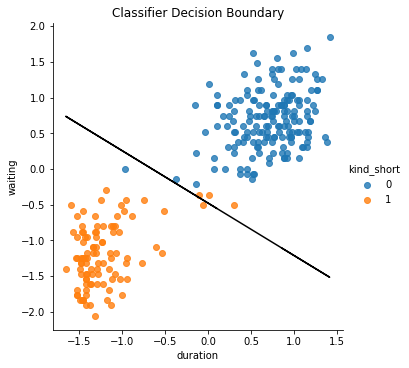

In [75]:
plt.figure(figsize=(10, 8));
sns.lmplot(x='duration', y='waiting', data=scaled_df, hue='kind_short', fit_reg=False, legend_out=True);
plt.plot(scaled_df['duration'], -dur/wait * scaled_df['duration'] - intercept/wait, '-k', label='Dec. Bound');
plt.title('Classifier Decision Boundary');
# plt.legend();